In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import json


In [9]:
def print_dict(d: dict) -> None:
    print(json.dumps(d, indent=2))

In [10]:
ticker_name = "CDR.WA"
yf_ticker = yf.Ticker(ticker_name)
print_dict(yf_ticker.info)

{
  "address1": "ul. Jagiellonska 74",
  "city": "Warsaw",
  "zip": "03-301",
  "country": "Poland",
  "phone": "48 22 519 6900",
  "fax": "48 22 375 7710",
  "website": "https://www.cdprojekt.com",
  "industry": "Electronic Gaming & Multimedia",
  "industryKey": "electronic-gaming-multimedia",
  "industryDisp": "Electronic Gaming & Multimedia",
  "sector": "Communication Services",
  "sectorKey": "communication-services",
  "sectorDisp": "Communication Services",
  "longBusinessSummary": "CD Projekt S.A., together its subsidiaries, engages in the development, publishing, and digital distribution of videogames for personal computers and video game consoles in Poland. The company operates through two segments, CD PROJEKT RED and GOG.com. Its product portfolio comprises The Witcher; The Witcher 2: Assassins of Kings; The Witcher 3: Wild Hunt; Thronebreaker: The Witcher Tales; Gwent: The Witcher Card game; and Cyberpunk 2077. The company also distributes videogames through GOG.com distrib

In [11]:
period = "4y"
interval = "1d"
historical_data = yf_ticker.history(
    period=period,
    interval=interval,
)
print(historical_data.info())
historical_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1045 entries, 2020-02-24 00:00:00+01:00 to 2024-02-23 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1045 non-null   float64
 1   High          1045 non-null   float64
 2   Low           1045 non-null   float64
 3   Close         1045 non-null   float64
 4   Volume        1045 non-null   int64  
 5   Dividends     1045 non-null   float64
 6   Stock Splits  1045 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 65.3 KB
None


C:\Users\bw200\AppData\Local\pypoetry\Cache\virtualenvs\py-quant-news-playground-0ZE7DJk8-py3.11\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-12 00:00:00+01:00,111.099998,114.300003,111.000000,113.349998,304140,0.0,0.0
2024-02-13 00:00:00+01:00,113.199997,113.300003,108.750000,109.300003,320700,0.0,0.0
2024-02-14 00:00:00+01:00,109.250000,110.800003,108.949997,110.300003,203121,0.0,0.0
2024-02-15 00:00:00+01:00,110.300003,115.050003,109.000000,113.750000,524823,0.0,0.0
2024-02-16 00:00:00+01:00,113.750000,115.000000,112.800003,114.500000,334885,0.0,0.0
2024-02-19 00:00:00+01:00,113.300003,115.300003,112.500000,114.099998,329348,0.0,0.0
2024-02-20 00:00:00+01:00,113.500000,114.849998,110.650002,114.750000,468422,0.0,0.0
2024-02-21 00:00:00+01:00,115.000000,116.349998,113.400002,113.500000,494349,0.0,0.0
2024-02-22 00:00:00+01:00,114.199997,115.550003,114.199997,115.449997,264746,0.0,0.0


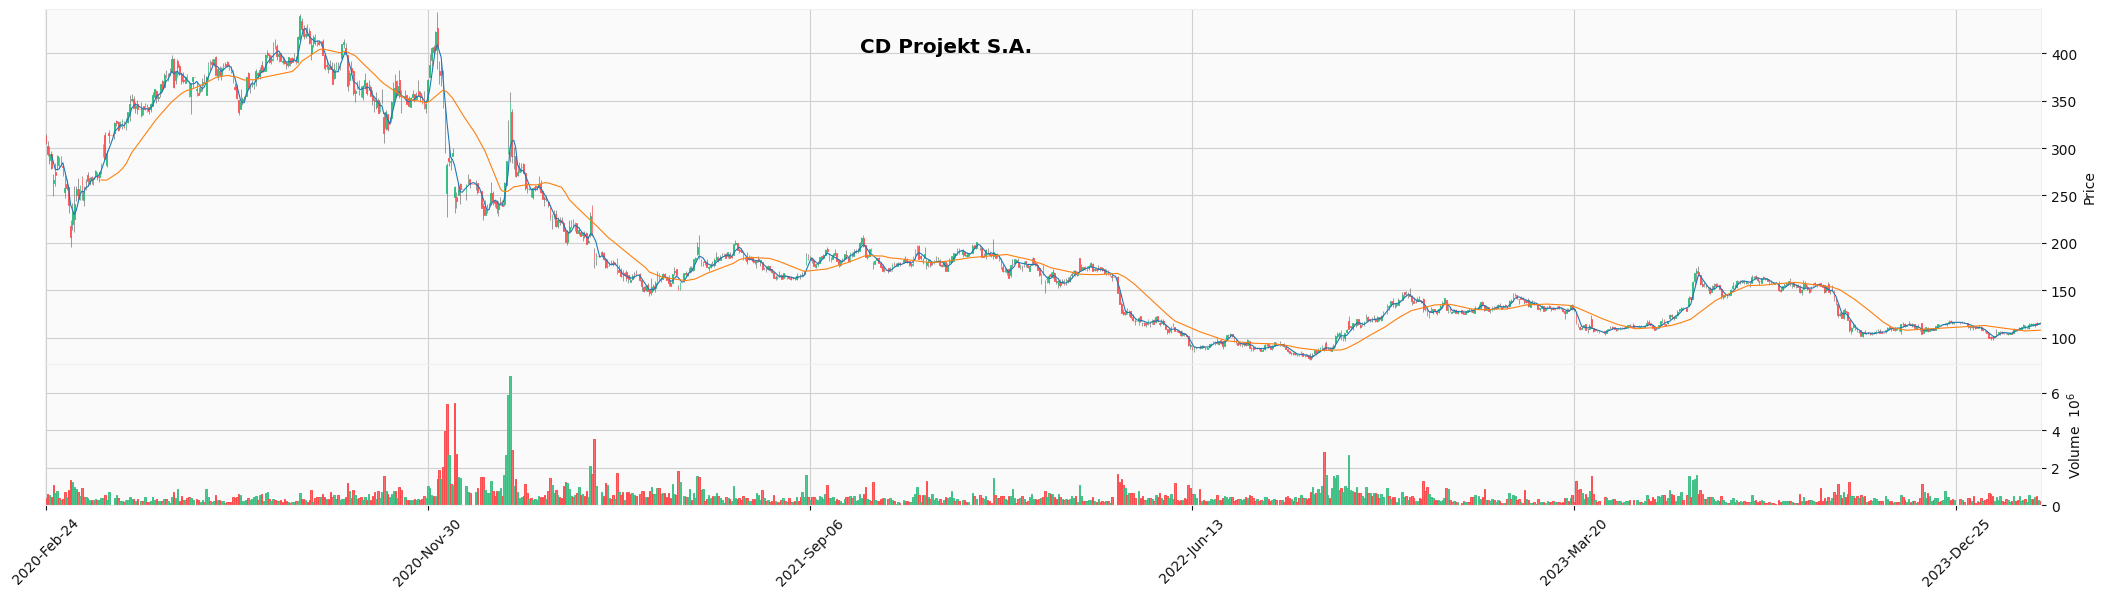

In [12]:
mpf.plot(
    historical_data,
    type="candle",
    mav=(4,30),
    volume=True,
    style="yahoo",
    figratio=(4,1),
    figscale = 1.0,
    show_nontrading=False,
    title=yf_ticker.info["longName"],
    tight_layout=True,
    warn_too_much_data=10_000,
)

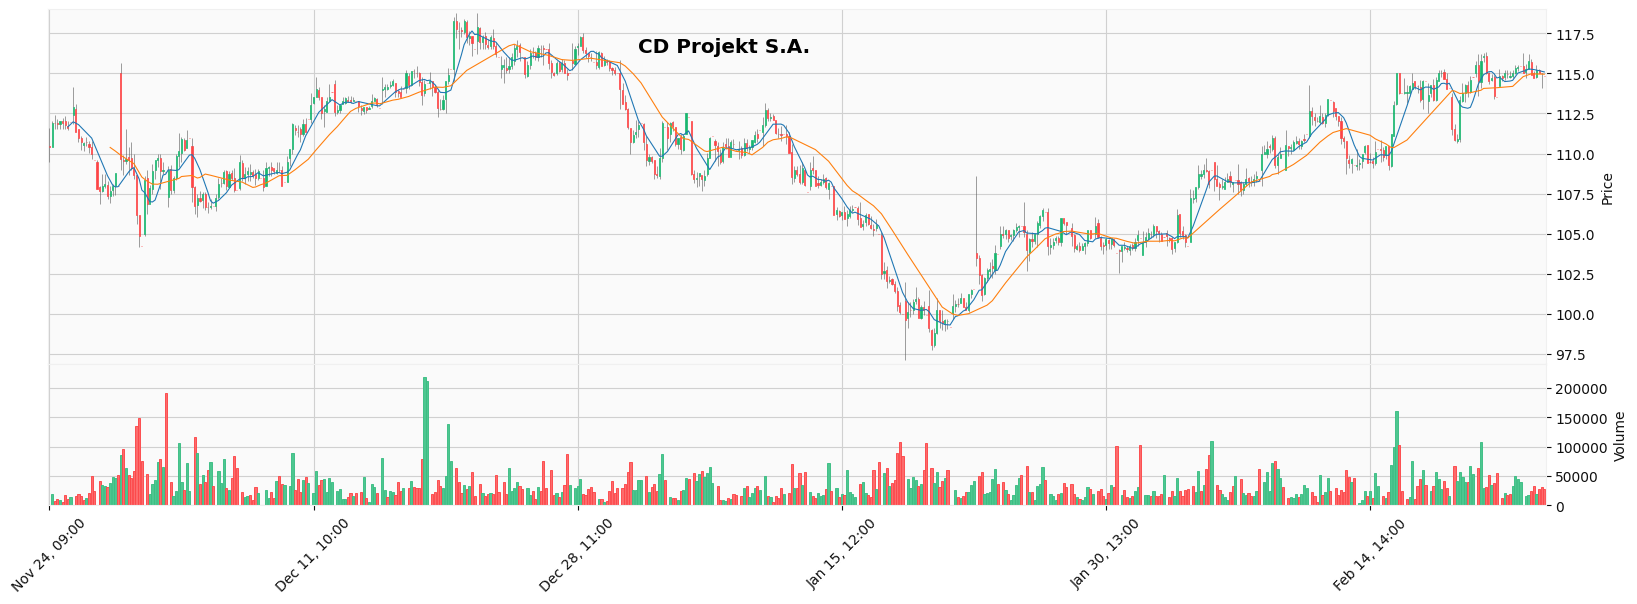

In [16]:
period = "3mo"
interval = "1h"
historical_data_hourly = yf_ticker.history(
    period=period,
    interval=interval,
)
f1, ax = plt.subplots(figsize=(10, 5))
mpf.plot(
    historical_data_hourly,
    type="candle",
    mav=(8,24),
    volume=True,
    style="yahoo",
    figratio=(3,1),
    figscale = 1.0,
    title=yf_ticker.info["longName"],
    tight_layout=True,
    show_nontrading=False,
    warn_too_much_data=10_000,

)

In [19]:
from stock_indicators import indicators as ind
adx = ind.get_sma(historical_data_hourly, 20)

TypeError: No method matches given arguments for List`1.Add: (<class 'str'>)